## Imbalanced

Imbalance data refers to a situation in which the classes within the dataset are not represented equally.

**Is a classification problem that affects the target variable.**


#### Loading and preparing the data

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [3]:
titanic = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/titanic_train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- Check for anomalies

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Upon checking the number of null values, we are going to drop the column **Cabin** and also dropping rows where **Age** is null.

In [7]:
titanic.drop(columns="Cabin", inplace = True)
titanic.dropna(inplace=True)

In [8]:
titanic.shape

(712, 11)

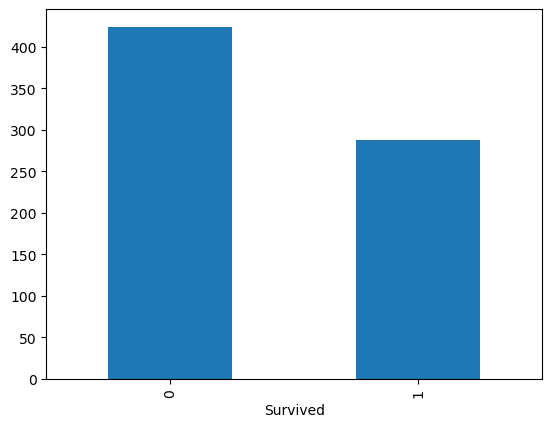

In [9]:
survived = titanic["Survived"].value_counts()
survived.plot(kind="bar")
plt.show()

- Preparing the data before modeling

In [11]:
titanic.drop(columns=["Name", "Ticket", "PassengerId"], inplace = True)

In [12]:
titanic["Sex"] = titanic["Sex"].replace({"male":0,
                                         "female":1})

C:\Users\sarah\AppData\Local\Temp\ipykernel_19816\1812906043.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic["Sex"] = titanic["Sex"].replace({"male":0,


In [13]:
titanic = pd.get_dummies(titanic, columns=["Embarked"])

In [14]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True


For baseline, we will train a Logistic Regression in imbalanced data.

In [16]:
features = titanic.drop(columns = ["Survived"])
target = titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
log_reg = LogisticRegression()

In [19]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [20]:
log_reg.score(X_test_scaled, y_test)

0.7808988764044944

In [16]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       104
           1       0.83      0.74      0.79        74

    accuracy                           0.83       178
   macro avg       0.83      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



#### Oversampling

In [21]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)


In [22]:
train["Survived"] = y_train.values

In [23]:
survived = train[train["Survived"] == 1]
no_survived = train[train["Survived"] == 0]

In [24]:
yes_diabetes_oversampled = resample(survived, 
                                    replace=True, 
                                    n_samples = len(no_survived),
                                    random_state=0)

In [25]:
train_over = pd.concat([yes_diabetes_oversampled, no_survived])
train_over

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
413,-1.502053,1.313198,-0.854385,0.537533,-0.496237,1.343618,2.096173,-0.186772,-1.887883,1
123,-1.502053,1.313198,-0.012190,-0.533522,-0.496237,3.204772,-0.477060,-0.186772,0.529694,1
293,-1.502053,-0.761500,-0.222739,-0.533522,-0.496237,-0.089890,2.096173,-0.186772,-1.887883,1
460,-0.301310,1.313198,1.110736,-0.533522,-0.496237,-0.389673,-0.477060,-0.186772,0.529694,1
163,-1.502053,1.313198,-0.503470,-0.533522,0.660928,0.364327,-0.477060,-0.186772,0.529694,1
...,...,...,...,...,...,...,...,...,...,...
529,0.899433,-0.761500,0.198359,0.537533,-0.496237,-0.346977,-0.477060,-0.186772,0.529694,0
530,0.899433,-0.761500,-0.433287,-0.533522,-0.496237,-0.467344,-0.477060,-0.186772,0.529694,0
531,0.899433,-0.761500,0.198359,-0.533522,-0.496237,-0.494143,-0.477060,5.354126,-1.887883,0
532,0.899433,-0.761500,-1.345665,2.679643,1.818093,-0.128044,-0.477060,-0.186772,0.529694,0


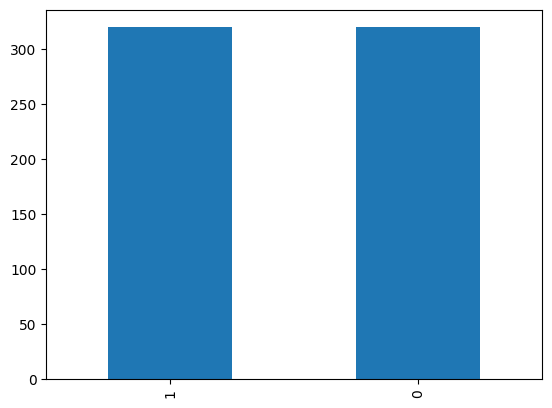

In [22]:
survived_plt = train_over["Survived"].value_counts()
survived_plt.plot(kind="bar")
plt.show()

- Now, with balanced data, we will create a new instance of Logistic Regression.

In [46]:
X_train_over = train_over.drop(columns = ["Survived"])
y_train_over = train_over["Survived"]

In [48]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [49]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       111
           1       0.64      0.73      0.69        67

    accuracy                           0.75       178
   macro avg       0.73      0.74      0.74       178
weighted avg       0.76      0.75      0.75       178



C:\Users\sarah\Anaconde\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [52]:
log_reg.score(X_test_scaled, y_test)

C:\Users\sarah\Anaconde\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7471910112359551

#### Undersampling

Undersampling involves removing data points from the majority class to align its size with that of the minority class

In [54]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,-0.301310,1.313198,-0.854385,-0.533522,-0.496237,-0.444179,-0.47706,-0.186772,0.529694,1
1,-0.301310,1.313198,-1.135116,-0.533522,0.660928,-0.280661,-0.47706,-0.186772,0.529694,1
2,0.899433,-0.761500,1.040553,-0.533522,-0.496237,-0.488692,-0.47706,-0.186772,0.529694,0
3,-1.502053,1.313198,1.110736,0.537533,0.660928,2.360459,-0.47706,-0.186772,0.529694,1
4,-0.301310,-0.761500,-0.714019,0.537533,0.660928,0.032749,-0.47706,-0.186772,0.529694,0
...,...,...,...,...,...,...,...,...,...,...
529,0.899433,-0.761500,0.198359,0.537533,-0.496237,-0.346977,-0.47706,-0.186772,0.529694,0
530,0.899433,-0.761500,-0.433287,-0.533522,-0.496237,-0.467344,-0.47706,-0.186772,0.529694,0
531,0.899433,-0.761500,0.198359,-0.533522,-0.496237,-0.494143,-0.47706,5.354126,-1.887883,0
532,0.899433,-0.761500,-1.345665,2.679643,1.818093,-0.128044,-0.47706,-0.186772,0.529694,0


In [56]:
no_diabetes_undersampled = resample(no_survived, 
                                    replace=False, 
                                    n_samples = len(survived),
                                    random_state=0)
no_diabetes_undersampled

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
104,0.899433,-0.761500,-0.503470,-0.533522,-0.496237,-0.488692,-0.47706,-0.186772,0.529694,0
436,-0.301310,-0.761500,0.198359,-0.533522,-0.496237,-0.444179,-0.47706,-0.186772,0.529694,0
345,-0.301310,-0.761500,0.689639,-0.533522,-0.496237,-0.398757,-0.47706,-0.186772,0.529694,0
259,0.899433,1.313198,1.251102,0.537533,-0.496237,-0.371504,-0.47706,-0.186772,0.529694,0
182,-1.502053,-0.761500,-0.082373,-0.533522,-0.496237,0.220794,-0.47706,-0.186772,0.529694,0
...,...,...,...,...,...,...,...,...,...,...
269,0.899433,-0.761500,-0.714019,-0.533522,-0.496237,-0.491494,-0.47706,-0.186772,0.529694,0
54,0.899433,-0.761500,-0.222739,-0.533522,-0.496237,-0.488692,-0.47706,-0.186772,0.529694,0
297,-1.502053,-0.761500,2.444211,-0.533522,-0.496237,-0.162565,-0.47706,-0.186772,0.529694,0
189,0.899433,1.313198,1.321285,0.537533,2.975258,-0.010402,-0.47706,-0.186772,0.529694,0


In [58]:
train_under = pd.concat([no_diabetes_undersampled, survived])
train_under

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
104,0.899433,-0.761500,-0.503470,-0.533522,-0.496237,-0.488692,-0.477060,-0.186772,0.529694,0
436,-0.301310,-0.761500,0.198359,-0.533522,-0.496237,-0.444179,-0.477060,-0.186772,0.529694,0
345,-0.301310,-0.761500,0.689639,-0.533522,-0.496237,-0.398757,-0.477060,-0.186772,0.529694,0
259,0.899433,1.313198,1.251102,0.537533,-0.496237,-0.371504,-0.477060,-0.186772,0.529694,0
182,-1.502053,-0.761500,-0.082373,-0.533522,-0.496237,0.220794,-0.477060,-0.186772,0.529694,0
...,...,...,...,...,...,...,...,...,...,...
517,-0.301310,-0.761500,0.338724,-0.533522,-0.496237,-0.398757,-0.477060,-0.186772,0.529694,1
519,0.899433,1.313198,-0.363104,-0.533522,2.975258,-0.285052,2.096173,-0.186772,-1.887883,1
521,-1.502053,-0.761500,0.479090,-0.533522,-0.496237,-0.155524,-0.477060,-0.186772,0.529694,1
522,-1.502053,1.313198,0.689639,0.537533,0.660928,0.875926,2.096173,-0.186772,-1.887883,1


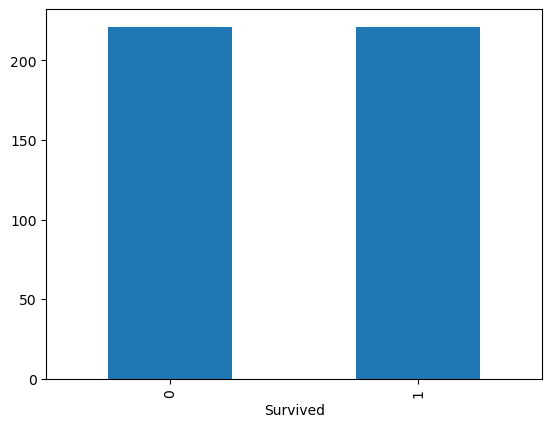

In [63]:
survived_plt = train_under["Survived"].value_counts()
survived_plt.plot(kind="bar")
plt.show()

Now, we have the same amount of observations for both survived and not_survived. Let's see how it can impact our model 

- Separating our features from our target

In [65]:
X_train_under = train_under.drop(columns = ["Survived"])
y_train_under = train_under["Survived"]

- Model training

In [68]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

- Evaluate our model

In [70]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       111
           1       0.64      0.73      0.69        67

    accuracy                           0.75       178
   macro avg       0.73      0.74      0.74       178
weighted avg       0.76      0.75      0.75       178



C:\Users\sarah\Anaconde\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### SMOTE

SMOTE utilizes KNN approach to generate synthetic samples for the minority class.

SMOTE comes from a different package - **imblearn**

In [72]:
from imblearn.over_sampling import SMOTE

Now, we need to create a SMOTE object in order to balance our data

- **sampling_strategy** - corresponds to the ratio of the number of samples in the minority class over the number of samples in the majority class.

In [74]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [76]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

- Now lets train our model, to see if get any improvements.

In [79]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

- Evaluate our model

In [81]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       111
           1       0.63      0.72      0.67        67

    accuracy                           0.74       178
   macro avg       0.72      0.73      0.73       178
weighted avg       0.75      0.74      0.74       178

